<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [5]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

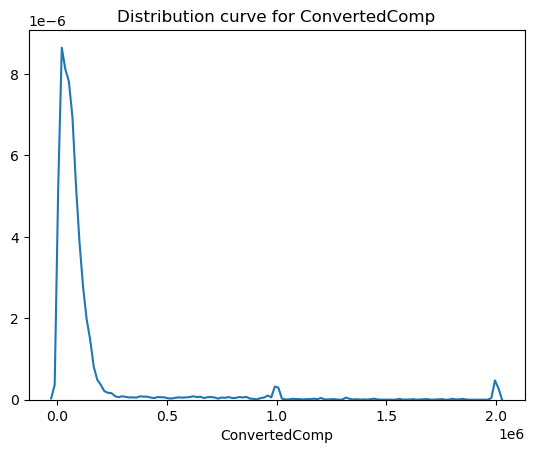

In [8]:
# your code goes here
plt.Figure(figsize=(10,6))
sns.distplot(df['ConvertedComp'], hist=False)
plt.title('Distribution curve for ConvertedComp')
plt.show()

<AxesSubplot:xlabel='ConvertedComp'>

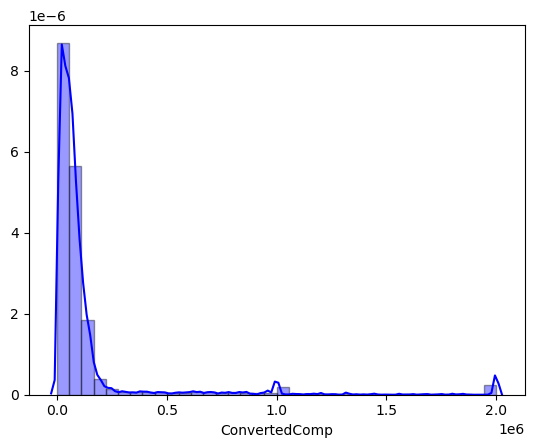

In [9]:
sns.distplot(df['ConvertedComp'], hist=True, kde=True, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'black'})

Plot the histogram for the column `ConvertedComp`.


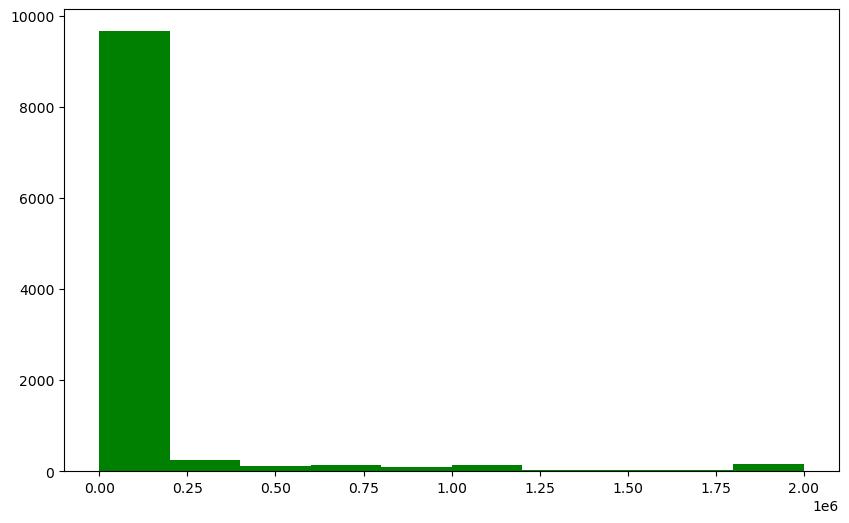

In [11]:
# your code goes here
#bins mean the no of histogram bins to be used.
#alpha is used to adjust the transparency of the graph plot. alpha = 1 by default.
#alpha < 1 makes the graph more transparent, > 1 reduces the transparency.
plt.figure(figsize=(10,6))
plt.hist(df['ConvertedComp'], color='Green')
plt.show()

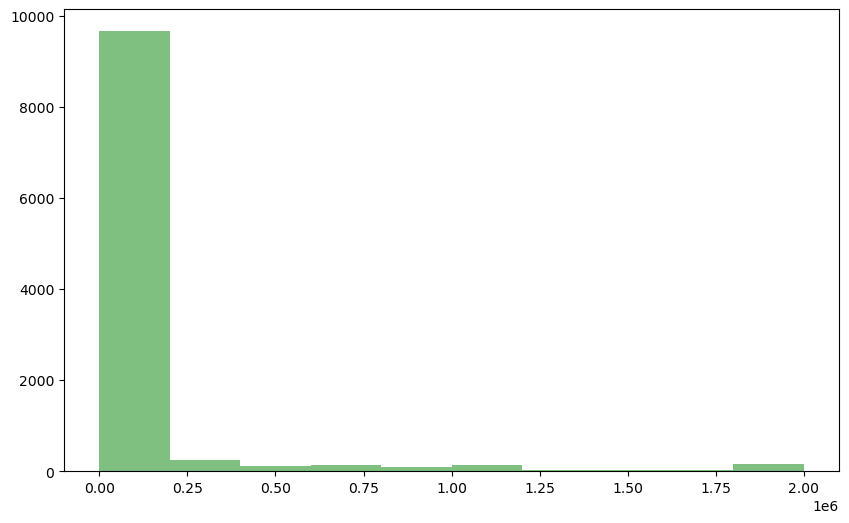

In [13]:
#alpha < 1 makes the graph more transparent, > 1 reduces the transparency.
plt.figure(figsize=(10,6))
plt.hist(df['ConvertedComp'], color='Green', alpha=0.5)
plt.show()

What is the median of the column `ConvertedComp`?


In [14]:
# your code goes here
median_cc = df['ConvertedComp'].median()
median_cc

57745.0

How many responders identified themselves only as a **Man**?


In [15]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [16]:
# your code goes here
woman_df=df[df['Gender']=='Woman']
woman_df["ConvertedComp"].median()

57708.0

In [19]:
#The "eq" is a dunder method in Python classes which stands for equality, meaning it defines the functionality of the equality operator (==). 
df[df['Gender'].eq('Woman')]['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [23]:
# your code goes here
df['Age'].describe().loc[['min','25%','50%','75%','max']]

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

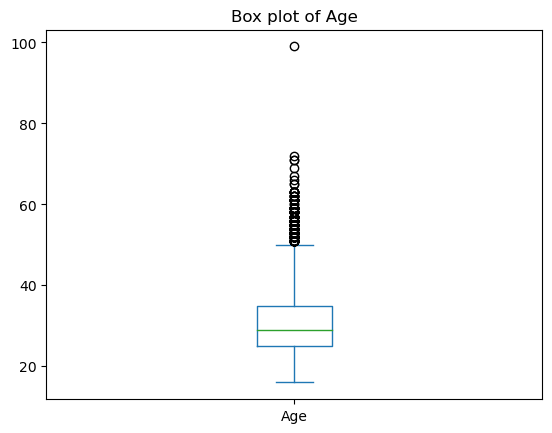

In [80]:
df['Age'].plot(kind='box')
plt.title('Box plot of Age')
plt.show()

Plot a histogram of the column `Age`.


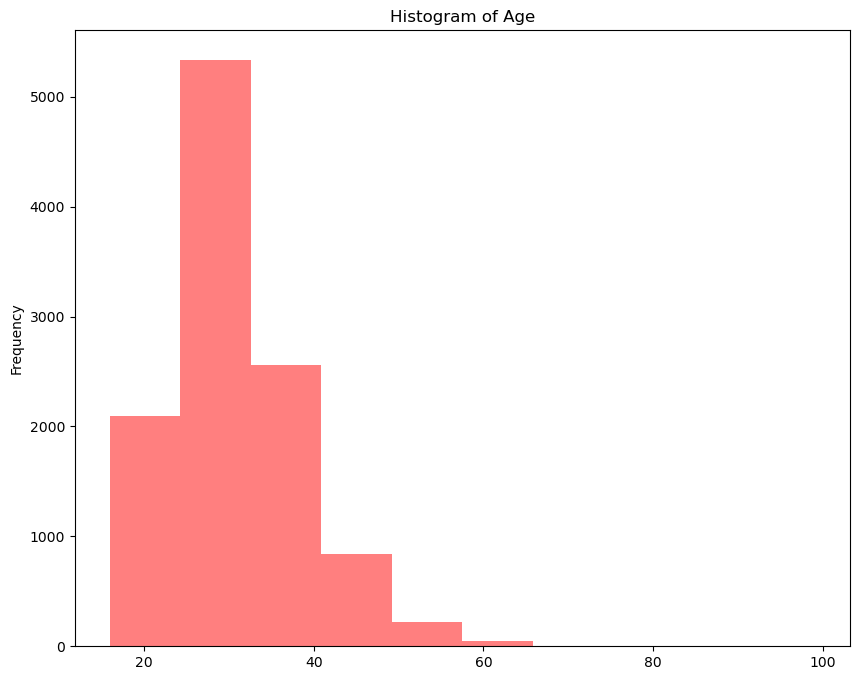

In [30]:
# your code goes here
plt.figure(figsize=(10,8))
#plt.hist(df['Age'], color='red', alpha=0.5)
df['Age'].plot(kind='hist', color='red', alpha=0.5)
plt.title('Histogram of Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


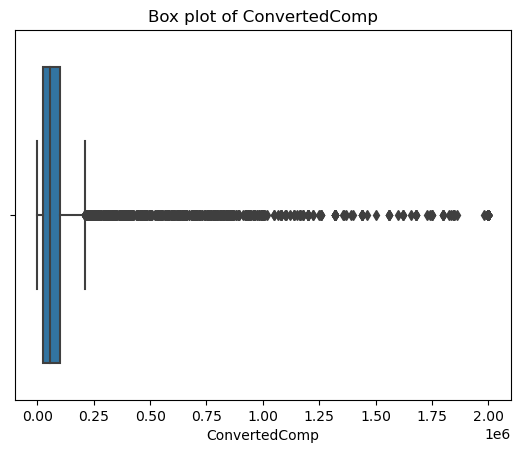

In [34]:
# your code goes here
sns.boxplot(df['ConvertedComp'])
plt.title('Box plot of ConvertedComp')
plt.show()

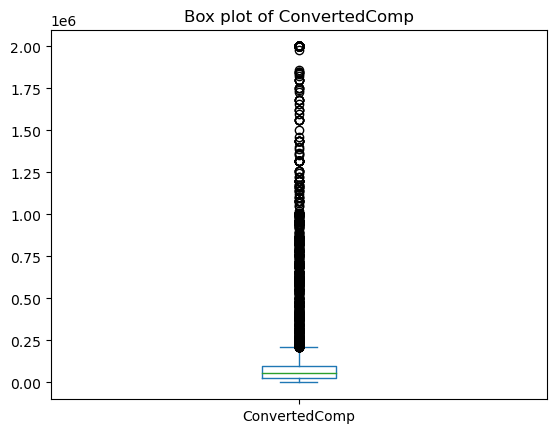

In [35]:
df['ConvertedComp'].plot(kind='box')
plt.title('Box plot of ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [36]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 - Q1
IQR

73132.0

Find out the upper and lower bounds.


In [64]:
# your code goes here
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


print('lower_bounds: ' + str(lower_limit))

print('upper_bounds: ' + str(upper_limit))

lower_bounds: -82830.0
upper_bounds: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [71]:
# your code goes here
(df[(df['ConvertedComp'] < lower_limit) | (df['ConvertedComp'] > upper_limit)]).count().sum()
#print(((df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))).count().sum())  

72302

In [72]:
#print(((df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))).count().sum())  

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [73]:
# your code goes here
df2 = df[(df['ConvertedComp'] > (Q1 - 1.5 * IQR)) & (df['ConvertedComp'] < (Q3 + 1.5 * IQR))] 
df2['ConvertedComp'].median() 

52704.0

In [81]:
df2['ConvertedComp'].mean() 

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [74]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


In [76]:
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
